<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task: Perform dimensionality reduction by applying Principal Component Analysis on the given dataset and eventually fit a logistic regression model on the reduced data**

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**No null values are present**

# Pre-processing

In [7]:
X = df.drop("HeartDisease",axis=1)
y = df.HeartDisease

## Preprocessing task
* Apply label encoding on `X`
* Re-scale the data to get the data of same magnitude
* Apply train test split

### Label encoding

In [8]:
# apply label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df['ChestPainType']=labelencoder.fit_transform(df['ChestPainType'])
df['RestingECG']=labelencoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']=labelencoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=labelencoder.fit_transform(df['ST_Slope'])

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Standard scaler

In [10]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df1=standardscaler.fit_transform(df.iloc[:,0:11])

### Split data

In [11]:
x=df1
y=df.iloc[:,11]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)

## Apply Logistic Regression before applying PCA

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(random_state=50)
model.fit(x_train,y_train)

LogisticRegression(random_state=50)

In [14]:
model.score(x_train,y_train)

0.848780487804878

## PCA

* Apply PCA with number of components = 5
* fit and transform pca on `X` and store new data in `X2`


In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x2=pca.fit_transform(x)

* Find number of components of pca

In [22]:
# print the number of components of pca
pca.n_components_

5

**Explained variance ratio** is the amount of variance explained by each feature (component) of PCA 

In [17]:
# print the variance explained by priciple components (there is an in-built attribute of pca for finding this)
pca.explained_variance_ratio_

array([0.25139665, 0.1330889 , 0.10512913, 0.09088956, 0.07916761])

In [18]:
# Print the total variance explained
np.sum(pca.explained_variance_ratio_)

0.6596718447968658

Text(0, 0.5, 'Cumulative explained variance')

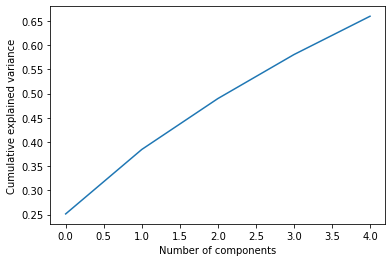

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Run the cells below to apply LogisticRegression on reduced data

In [20]:
# Train test split of X2
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=47)

In [21]:
log = LogisticRegression(max_iter=1000)
log = log.fit(X_train, y_train)
log.score(X_test, y_test)

0.8206521739130435